In [3]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

c:\Users\dlkan\anaconda3\envs\tensorflow\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\dlkan\anaconda3\envs\tensorflow\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\dlkan\anaconda3\envs\tensorflow\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [4]:
df = pd.read_excel('aug_nine_var.xlsx')

In [5]:
X = df.iloc[:,1:22]
y = df.iloc[:,22:23]

In [1]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

NameError: name 'StandardScaler' is not defined

히트맵

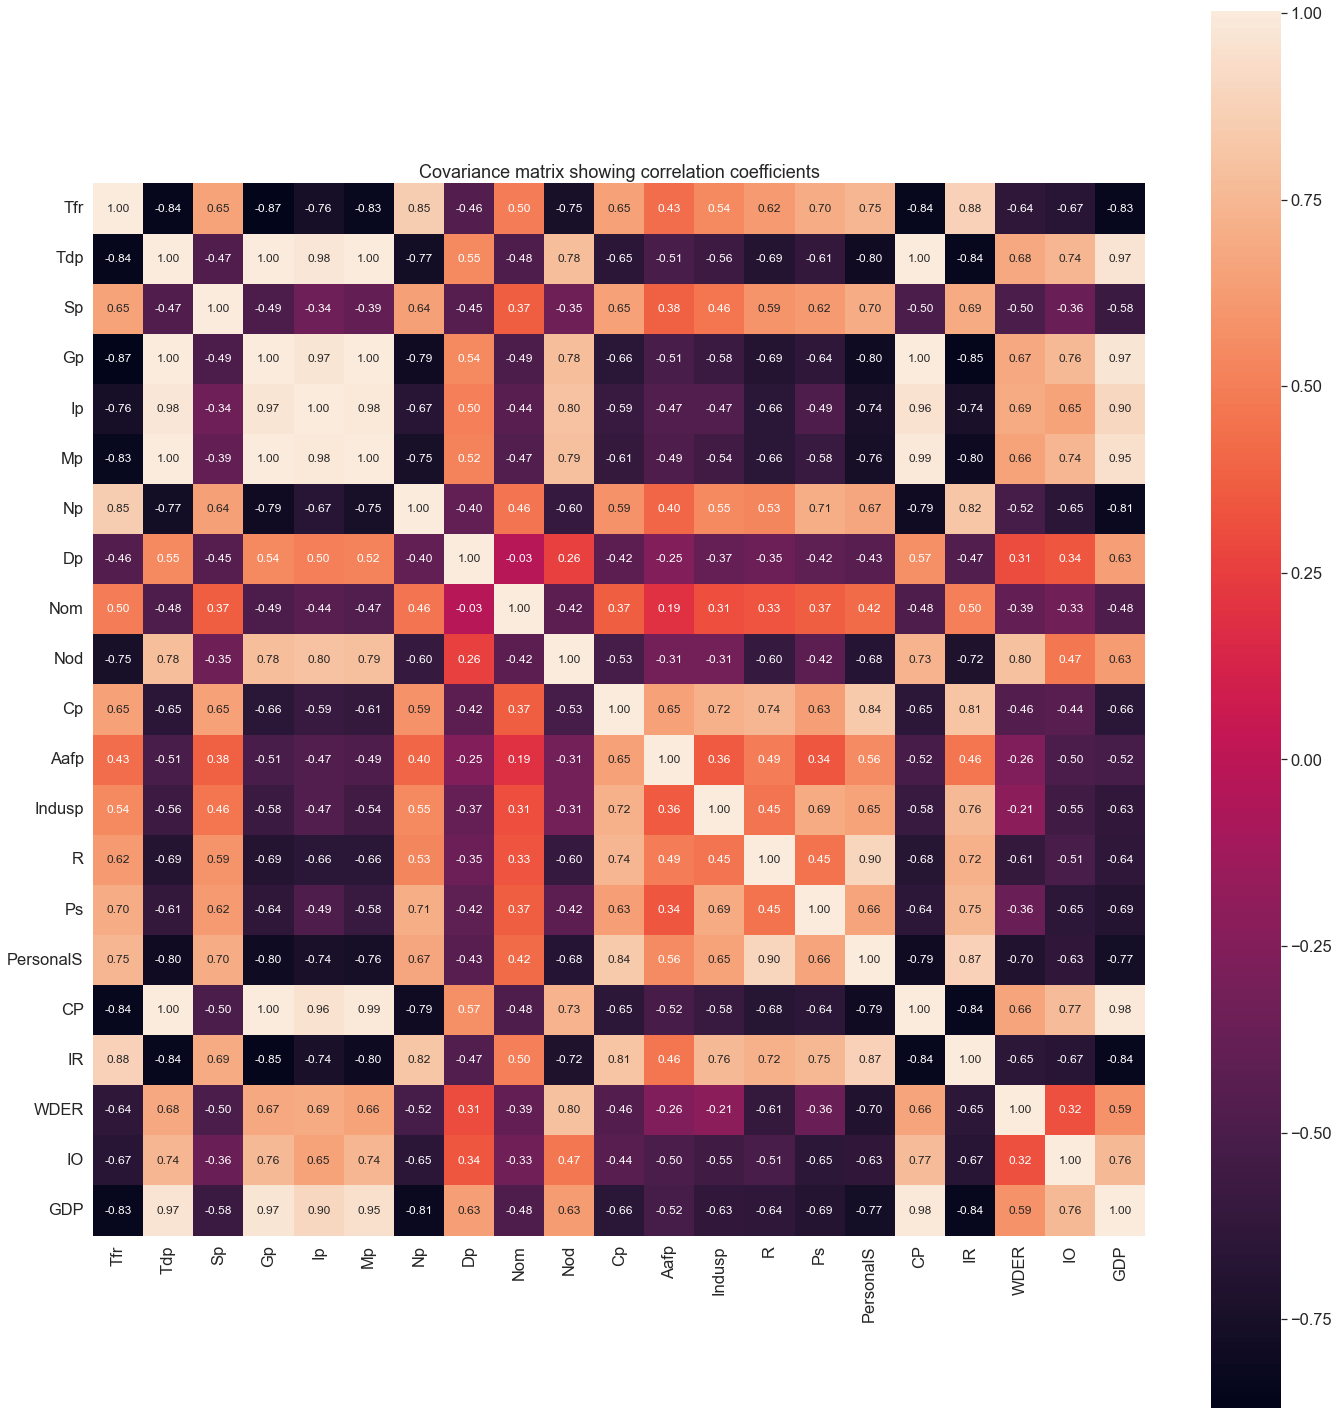

In [8]:
import seaborn as sns
cov_mat =np.cov(X.T)
cols = ['Tfr', 'Tdp', 'Sp', 'Gp', 'Ip', 'Mp', 'Np',
       'Dp', 'Nom', 'Nod', 'Cp', 'Aafp', 'Indusp', 'R', 'Ps',
       'PersonalS', 'CP', 'IR', 'WDER', 'IO', 'GDP']

plt.figure(figsize=(20,20))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 yticklabels=cols,
                 xticklabels=cols)
plt.title('Covariance matrix showing correlation coefficients')
plt.tight_layout()
plt.show()

In [9]:
numpY = y.to_numpy()

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X, numpY, test_size=0.2, random_state=42,shuffle=True)

In [11]:
model = tf.keras.Sequential()
model.add(layers.Dense(1024, input_dim=21, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              22528     
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 16)                5

In [12]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [53]:
hist = model.fit(X_train, y_train, epochs=10000, batch_size=64, validation_split=0.2, verbose=1, callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10
                                                                                                                                              )])

Epoch 1/10000
4/4 [==============================] - 0s 33ms/step - loss: 0.2743 - mae: 0.4589 - val_loss: 1.8341 - val_mae: 1.0964
Epoch 2/10000
4/4 [==============================] - 0s 17ms/step - loss: 0.3416 - mae: 0.4932 - val_loss: 1.0020 - val_mae: 0.7951
Epoch 3/10000
4/4 [==============================] - 0s 17ms/step - loss: 0.2077 - mae: 0.3620 - val_loss: 1.0897 - val_mae: 0.8896
Epoch 4/10000
4/4 [==============================] - 0s 18ms/step - loss: 0.1827 - mae: 0.3477 - val_loss: 1.1025 - val_mae: 0.8335
Epoch 5/10000
4/4 [==============================] - 0s 20ms/step - loss: 0.1179 - mae: 0.2777 - val_loss: 1.0191 - val_mae: 0.8464
Epoch 6/10000
4/4 [==============================] - 0s 17ms/step - loss: 0.0807 - mae: 0.2204 - val_loss: 0.9834 - val_mae: 0.8018
Epoch 7/10000
4/4 [==============================] - 0s 18ms/step - loss: 0.0713 - mae: 0.2132 - val_loss: 0.9496 - val_mae: 0.7546
Epoch 8/10000
4/4 [==============================] - 0s 18ms/step - loss: 0.

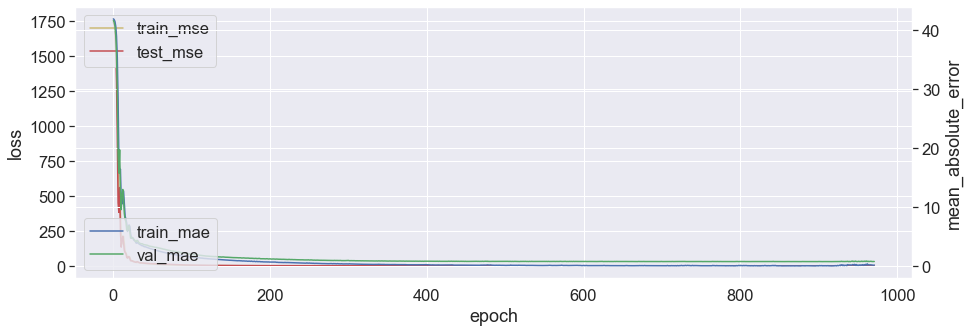

In [14]:
fig, loss_ax = plt.subplots(figsize=(15, 5))

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train_mse')   # 훈련데이터의 loss (즉, mse)
loss_ax.plot(hist.history['val_loss'], 'r', label='test_mse') # 검증데이터의 loss (즉, mse)

acc_ax.plot(hist.history['mae'], 'b', label='train_mae')   # 훈련데이터의 mae
acc_ax.plot(hist.history['val_mae'], 'g', label='val_mae') # 검증데이터의 mae

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('mean_absolute_error')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [15]:
w = model.get_weights()

선형 관계 확인

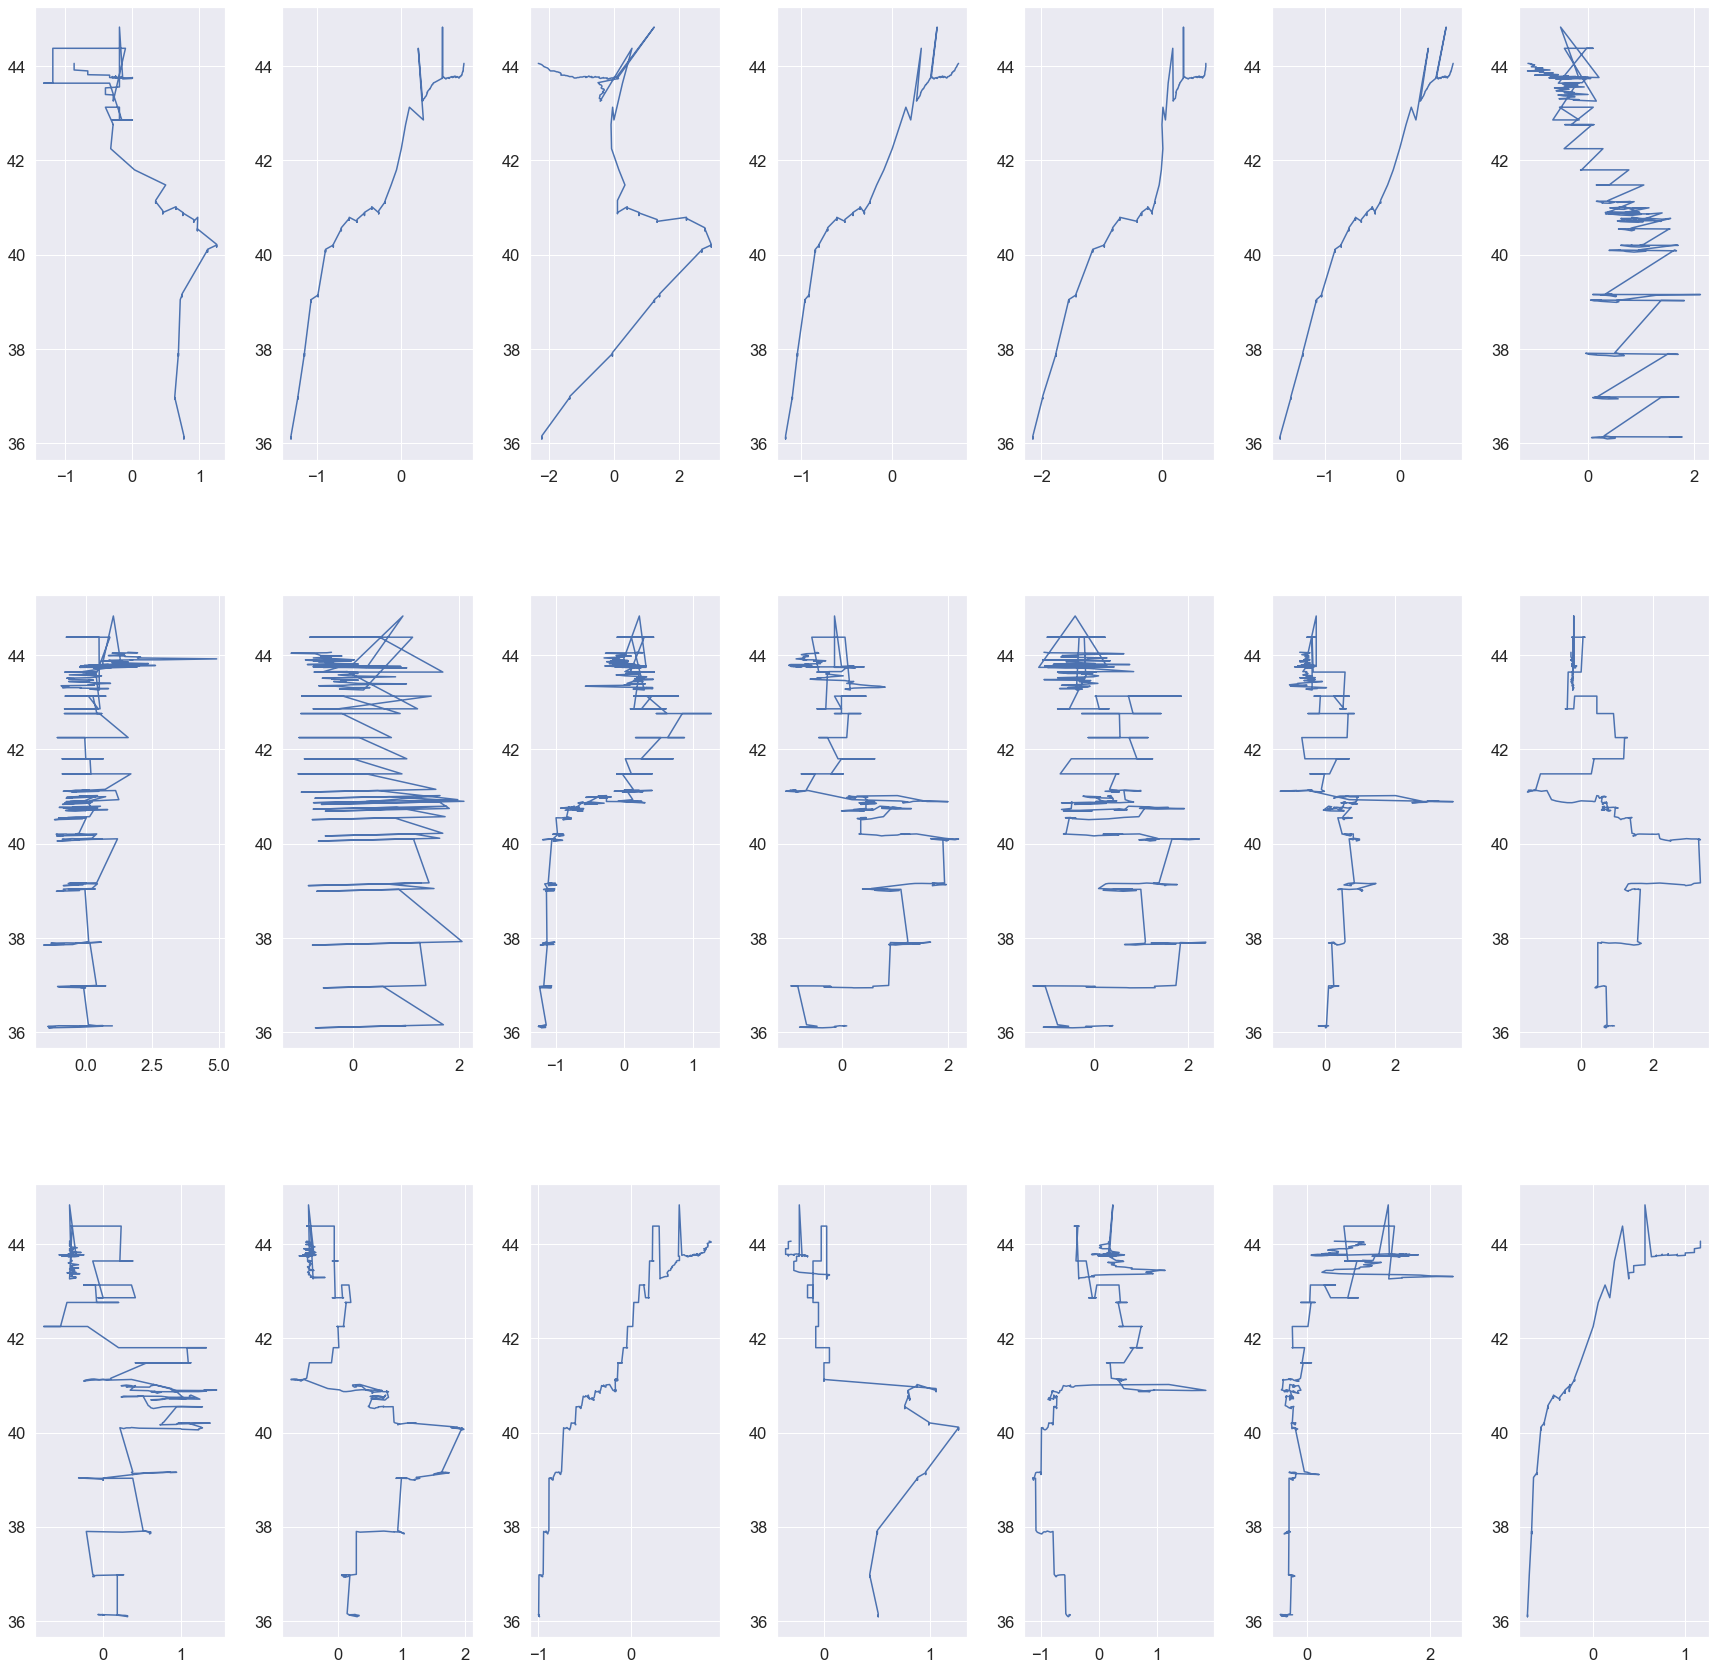

In [19]:
X = scaler.inverse_transform(X)

arr = []
x_ = []

for j in range(21):
    for i in range(395):
        x_.append(X[i][j])
    arr.append(x_)
    x_ = []
    
arr = np.array(arr)
print(len(arr[0]))

for i in range(len(arr)):
    for j in range(len(arr)):
        if np.array_equal(arr[i], arr[j]):
            if i != j:
                print(i, j)
    
f, axes = plt.subplots(3, 7)
f.set_size_inches((30, 30))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

cnt = 0

for i in range(3):
    for j in range(7):
        axes[i][j].plot(arr[cnt], y)
        cnt = cnt + 1

plt.show()


변수 중요도 확인

In [71]:
train = pd.DataFrame(X_train)
train.columns = df.iloc[:,1:22].columns

In [80]:
from sklearn.inspection import permutation_importance # sklearn 22 버전부터 해당
from sklearn.metrics import make_scorer

# MAPE
def mean_absolute_percentage_error(y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# fix_model : 훈련된 모델
# X_train : 훈련데이터 Feature
# y_train : 훈련데이터 Target
# scoring : Feature 를 Shuffler 한 뒤, 예측값과 실제값을 어떤 Metric 을 사용해 비교할지
# n_repeats : 특정 Feature 를 몇번 Shuffle 할 것인지
# random_state : 난수 고정
result = permutation_importance(model, X_train, y_train, scoring = make_scorer(mean_absolute_percentage_error,greater_is_better=False),
                            n_repeats=3,
                            random_state=0)
# Feature label
Feature = train

# Feature 중요도를 오름차순으로 정렬한 뒤, 해당 Feature 의 index 를 저장
sorted_result = result.importances_mean.argsort()

# 결과를 DataFrame 화
importances = pd.DataFrame(result.importances_mean[sorted_result], index=Feature.columns[sorted_result]).sort_values(0, ascending=False)   
importances

,0
국내총생산,20.863633
경기도인구,11.248601
수도권 인구,11.157178
인천시인구,9.462076
소비자 물가 지수,6.780858
금리,6.191273
원 달러 환율,4.776604
- 집세,4.077565
소비자물가,3.987477
"국제유가(WTI, 달러)",3.735541


그래프는 JBK 코드 참조